In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import warnings

pd.set_option('display.max_colwidth', None)

In [2]:
inspections = pd.read_csv("prohlidky.csv")
inspections = inspections.drop(['Unnamed: 0'], axis=1)
inspections.DatKont = pd.to_datetime(inspections.DatKont)
inspections.DatPrvReg = pd.to_datetime(inspections.DatPrvReg)
display(inspections.head())
display(inspections.info())

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
0,3122,Evidencni kontrola,JMZBLA2G601258504,2018-01-02 11:03:12.833,LF,MAZDA,OSOBNI AUTOMOBIL,3,M1,2011-02-10,84818,0,0,0,zpusobile,---
1,3205,Evidencni kontrola,4150417,2018-01-02 11:06:07.617,EM150.2,MZ,MOTOCYKL,ETZ 150,L3e,1989-01-01,38828,0,0,0,zpusobile,---
2,3114,Evidencni kontrola,VF3MJAHXHGS280168,2018-01-02 11:15:08.083,AH01,PEUGEOT,OSOBNI AUTOMOBIL,3008,M1,2017-01-09,39227,0,0,0,zpusobile,---
3,3618,Evidencni kontrola,4699845,2018-01-02 11:19:22.967,1202,SKODA,OSOBNI AUTOMOBIL,1202,M1,1979-06-04,38951,0,0,0,zpusobile,---
4,3748,Evidencni kontrola,WF0SXXGCDSAU06730,2018-01-02 11:30:25.420,GPDC,FORD,OSOBNI AUTOMOBIL,FOCUS (DA3),M1,2010-06-29,254194,0,0,0,zpusobile,---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728369 entries, 0 to 3728368
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STK         int64         
 1   DrTP        object        
 2   VIN         object        
 3   DatKont     datetime64[ns]
 4   TypMot      object        
 5   TZn         object        
 6   DrVoz       object        
 7   ObchOznTyp  object        
 8   Ct          object        
 9   DatPrvReg   datetime64[ns]
 10  Km          int64         
 11  ZavA        int64         
 12  ZavB        int64         
 13  ZavC        int64         
 14  VyslSTK     object        
 15  VyslEmise   object        
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 455.1+ MB


None

In [3]:
stations = pd.read_csv("stk_form_pg.csv")
# stations = stations.drop(['Unnamed: 0'], axis=1)
display(stations.head())
display(stations.info())

,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
0,312,"OA, ZS",198 00,Praha 14,Skorkovská 1537,"TÜV NORD Czech, s.r.o.","281 915 951, 281 915 952",zizkovsky@tuev-nord.cz; stk-praha@tuev-nord.cz,Praha,Praha,Hlavní město Praha,0,0,0,0,"Po: 7:30-19:30, Út: 7:30-19:30, St: 7:30-19:30, Čt: 7:30-19:30, Pá: 7:30-19:30, So: 8:00-16:00"
1,3207,"OA, ZS",272 04,Kladno,Vašíčkova 71,AUTOŠTOL-STK s r.o.,312 267 113,stk3207@stkkladno.cz,Kladno,Kladno,Středočeský kraj,880,400,700,800,"Po: 6:00-17:30, Út: 6:00-16:30, St: 6:00-17:30, Čt: 6:00-16:30, Pá: 6:00-14:30"
2,3127,OA,184 00,Praha 9,Dopraváků 874/15,TEKOSO-STK spol.s r.o.,273130110,stk3127@seznam.cz,Praha,Praha,Hlavní město Praha,0,0,0,0,"Po: 7:00-17:00, Út: 7:00-17:00, St: 7:00-17:00, Čt: 7:00-17:00, Pá: 7:00-17:00"
3,3112,"OA, NA, TRA, ZS",109 00,Praha 15,K Měcholupům 3,"AUTO-VESELÝ, s.r.o.",274 877 292,vesely@stkmecholupy.cz,Praha,Praha,Hlavní město Praha,850,390,600,800,"Po: 7:00-16:30, Út: 7:00-16:30, St: 7:00-16:30, Čt: 7:00-16:30, Pá: 7:00-11:00"
4,3128,OA,149 00,Praha 4,Mezi vodami 1097/25,ESPM s.r.o.,725888170,info@stk-modrany.cz,Praha,praha,Hlavní město Praha,0,0,0,0,"Po: 7:30-17:00, Út: 7:30-17:00, St: 7:30-17:00, Čt: 7:30-17:00, Pá: 7:30-17:00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stk_id            372 non-null    int64 
 1   rozsah_opravneni  372 non-null    object
 2   psc               372 non-null    object
 3   mesto             372 non-null    object
 4   ulice             372 non-null    object
 5   provozovatel      372 non-null    object
 6   tel               372 non-null    object
 7   mail              372 non-null    object
 8   orp               372 non-null    object
 9   okres             372 non-null    object
 10  kraj              372 non-null    object
 11  cenastk           372 non-null    int64 
 12  cenaevkont        372 non-null    int64 
 13  cenaemiseb        372 non-null    int64 
 14  cenaemisen        372 non-null    int64 
 15  pracovnidoba      372 non-null    object
dtypes: int64(5), object(11)
memory usage: 46.6+ KB


None

In [4]:
#split inspections to see the progress 
inspections_split = np.array_split(inspections, 1000)
out_of_working_hours = pd.DataFrame(data=None, columns=inspections.columns)
out_of_working_hours['pracovnidoba'] = np.nan
out_of_working_hours['duvod'] = np.nan

In [ ]:
#find inspections out of station's working hours
stations.loc[stations['pracovnidoba'] == "Nákladní auta", 'pracovnidoba'] = "0"
stations.loc[stations['pracovnidoba'] == "Pouze Nákladní a autobusy", 'pracovnidoba'] = "0"
stations['stk_id'] = stations['stk_id'].apply(lambda x: x if 4 == len(str(x)) else x * 10)
daysofweek = [1, 2, 3, 4, 5, 6, 0]
daysofweekstr = {
  0: "Po: ",
  1: "Út: ",
  2: "St: ",
  3: "Čt: ",
  4: "Pá: ",
  5: "So: ",
  6: "Ne: "
}

for part in inspections_split:
    out_of_working_hours = out_of_working_hours.iloc[0:0]
    for index, row in part.iterrows():
        for dayofweek in daysofweek:
            if row.DatKont.weekday() == dayofweek:
                try:
                    if len(stations.where(stations['stk_id'] == row['STK']).dropna(how='all').pracovnidoba.all()) > 10:
                        pracovnidoba = stations.where(stations['stk_id'] == row['STK']).dropna(how='all').pracovnidoba.to_string()
                        index = pracovnidoba.find(daysofweekstr[dayofweek])
                        if index != -1:
                            pattern = re.compile('(.)*{0}(\d):(\d\d)+-(\d\d):(\d\d).*'.format(daysofweekstr[dayofweek]))
                            match = pattern.match(str(pracovnidoba))
                            if match:
                                insp_time = row['DatKont'].hour * 60 + row['DatKont'].minute
                                before = int(match.group(2)) * 60 + int(match.group(3))
                                after = int(match.group(4)) * 60 + int(match.group(5))
                                if insp_time < before:
                                    row['pracovnidoba'] = pracovnidoba
                                    row['duvod'] = "OUT OF TIME RANGE: -{0}".format(before - insp_time)
                                    out_of_working_hours = out_of_working_hours.append(row)
                                if insp_time > after:
                                    row['pracovnidoba'] = pracovnidoba
                                    row['duvod'] = "OUT OF TIME RANGE: +{0}".format(insp_time - after)
                                    out_of_working_hours = out_of_working_hours.append(row)
                            else:
                                row['pracovnidoba'] = pracovnidoba
                                row['duvod'] = "ERROR: NO MATCH"
                                out_of_working_hours = out_of_working_hours.append(row)
                        else:
                            row['pracovnidoba'] = pracovnidoba
                            row['duvod'] = "OUT OF WEEKDAY: {0}".format(row.DatKont.weekday())
                            out_of_working_hours = out_of_working_hours.append(row)
                except:
                    print(row)
    out_of_working_hours.to_csv("out_of_working_hours.csv", mode='a')

In [ ]:
out_of_working_hours = pd.read_csv('out_of_working_hours.csv')

In [11]:
class SupressSettingWithCopyWarning:
    def __enter__(self):
        pd.options.mode.chained_assignment = None

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = 'warn'

In [7]:
stations.loc[stations['pracovnidoba'] == "Nákladní auta", 'pracovnidoba'] = "0"
stations.loc[stations['pracovnidoba'] == "Pouze Nákladní a autobusy", 'pracovnidoba'] = "0"
stations['stk_id'] = stations['stk_id'].apply(lambda x: x if 4 == len(str(x)) else x * 10)
ids = stations[stations.pracovnidoba != '0'].stk_id

In [5]:
#leave out duplicates and errors
out_of_working_hours = out_of_working_hours.drop_duplicates()
out_of_working_hours = out_of_working_hours.drop(out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match('ERROR: NO MATCH')].index)
#out_of_working_hours = out_of_working_hours.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)

In [8]:
#leave out the one's without working hours known
out_of_working_hours = out_of_working_hours[out_of_working_hours.STK.isin(ids)]

In [9]:
out_of_working_hours

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,...,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise,pracovnidoba,duvod
32768,32768,35895,2072722.0,3523,pravidelna,TMBJT21Z8B2043223,2018-09-17 17:36:02.097,CAYC,SKODA,OSOBNI AUTOMOBIL,...,M1,2010-10-07,161361,0,0,0,zpusobile,vyhovuje,"119 Po: 6:30-17:00, Út: 6:30-17:00, St: 6:30-17:00, Čt: 6:30-17:00, Pá: 6:30-12:00, So: 7:30-12:00",OUT OF TIME RANGE: +36
32769,32769,35896,2072794.0,3523,pravidelna,JH2SC68E9DK000096,2018-08-03 13:54:30.657,SC47E,HONDA,MOTOCYKL,...,L3e,2013-04-04,8655,0,0,0,zpusobile,---,"119 Po: 6:30-17:00, Út: 6:30-17:00, St: 6:30-17:00, Čt: 6:30-17:00, Pá: 6:30-12:00, So: 7:30-12:00",OUT OF TIME RANGE: +114
32770,32770,35897,2072796.0,3112,Evidencni kontrola,WAUZZZ8P6CA103180,2018-08-06 16:47:06.250,CAYC,AUDI,OSOBNI AUTOMOBIL,...,M1,2012-01-13,63420,0,1,0,castecne zpusobile,---,"3 Po: 7:00-16:30, Út: 7:00-16:30, St: 7:00-16:30, Čt: 7:00-16:30, Pá: 7:00-11:00",OUT OF TIME RANGE: +17
32771,32771,35898,2072819.0,3210,Evidencni kontrola,JYA56V00XFA003522,2018-10-06 08:28:23.873,56V,YAMAHA,MOTOCYKL,...,LC,1993-05-18,39727,0,0,0,zpusobile,---,"274 Po: 6:00-17:00, Út: 6:00-17:00, St: 6:00-17:00, Čt: 6:00-17:00, Pá: 6:00-13:00",OUT OF WEEKDAY: 5
32772,32772,35899,2072891.0,3202,Evidencni kontrola,TMBZZZ1U5V2032991,2018-08-10 17:15:01.933,AGR,SKODA,OSOBNI AUTOMOBIL,...,M1,1997-08-04,279303,0,0,0,zpusobile,---,"6 Po: 7:00-19:00, Út: 7:00-19:00, St: 7:00-19:00, Čt: 7:00-19:00, Pá: 7:00-16:00, So: 8:00-12:00",OUT OF TIME RANGE: +75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59481,59481,65097,3727907.0,3239,Na zadost zakaznika,TMBJG7NE5G0200119,2018-07-15 10:07:48.960,CXX,SKODA,OSOBNI AUTOMOBIL,...,M1,2016-03-23,106554,0,0,0,zpusobile,---,"61 Po: 6:00-21:00, Út: 6:00-21:00, St: 6:00-21:00, Čt: 6:00-21:00, Pá: 6:00-21:00, So: 7:00-12:00",OUT OF WEEKDAY: 6
59482,59482,65098,3727989.0,3758,pravidelna,W0LSC9CC7E4114991,2018-03-13 16:42:12.023,B14XER,OPEL,OSOBNI AUTOMOBIL,...,M1,2014-03-24,19933,0,0,0,zpusobile,vyhovuje,"65 Po: 7:00-16:30, Út: 7:00-16:30, St: 7:00-16:30, Čt: 7:00-16:30, Pá: 7:00-15:00, So: 8:00-13:00",OUT OF TIME RANGE: +12
59483,59483,65099,3728155.0,3311,pravidelna,TMBZZZ1U2W2055243,2018-03-05 05:44:46.363,AEE,SKODA,OSOBNI AUTOMOBIL,...,M1,1997-12-15,314080,6,0,0,zpusobile,vyhovuje,"68 Po: 7:00-17:00, Út: 7:00-17:00, St: 7:00-17:00, Čt: 7:00-17:00, Pá: 7:00-17:00",OUT OF TIME RANGE: -76
59484,59484,65101,3728185.0,3413,pravidelna,VF7EB4HWB13109745,2018-03-05 17:10:01.330,4HW,CITROEN,OSOBNI AUTOMOBIL,...,M1,2003-10-24,230559,5,0,0,zpusobile,vyhovuje,"289 Po: 6:00-17:00, Út: 6:00-17:00, St: 6:00-17:00, Čt: 6:00-17:00, Pá: 6:00-17:00",OUT OF TIME RANGE: +10


In [187]:
#number of stations with inspections out of working day
len(out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match('OUT OF WEEKDAY:')].groupby('STK').count().sort_values('DrTP').index)

43

In [175]:
out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match('OUT OF WEEKDAY:')].groupby('STK').count().sort_values('DrTP', ascending=False).head(5).DrTP

STK
3210    391
3241    320
3739    204
3801    147
3632     95
Name: DrTP, dtype: int64

In [176]:
out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match('OUT OF WEEKDAY:')].groupby('duvod').count().STK

duvod
OUT OF WEEKDAY: 5    1867
OUT OF WEEKDAY: 6     127
Name: STK, dtype: int64

Text(0, 0.5, '#stk')

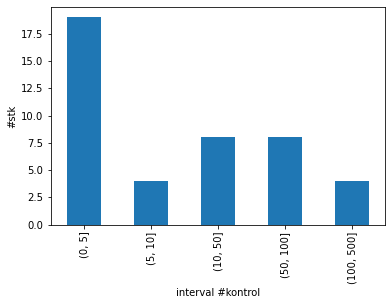

In [19]:
bins= [0, 5, 10, 50, 100, 500]
df = out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match('OUT OF WEEKDAY:')].groupby('STK').count().sort_values('DrTP', ascending=False)
df = df.groupby(pd.cut(df['DrTP'], bins=bins)).DrTP.count()
ax = df.plot(kind='bar')
ax.set_xlabel("interval #kontrol")
ax.set_ylabel("#stk")

In [20]:
do = out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match(r'^OUT OF TIME RANGE: \-.*$')]
po = out_of_working_hours[out_of_working_hours.duvod.astype(str).str.match(r'^OUT OF TIME RANGE: \+.*$')]

In [21]:
with SupressSettingWithCopyWarning():
    do['diff'] = do['duvod'].str.extract('(\d+)').astype(int)
    po['diff'] = po['duvod'].str.extract('(\d+)').astype(int)

Text(0.5, 1.0, 'po zavírací hodině')

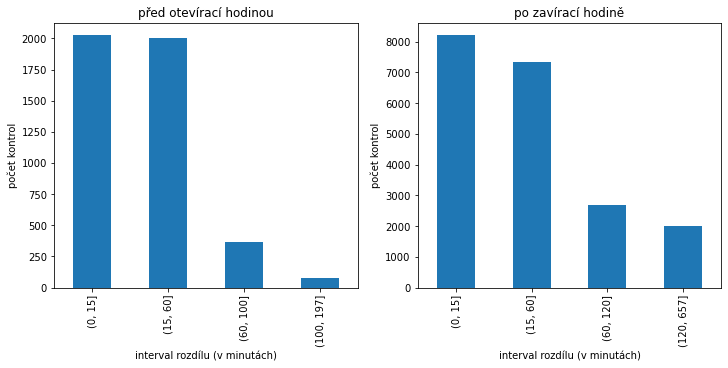

In [22]:
bins= [0, 15, 60, 100, 197]
df = do.sort_values('diff', ascending=False)
df = df.groupby(pd.cut(df['diff'], bins=bins)).DrTP.count()

bins= [0, 15, 60, 120, 657]
df2 = po.sort_values('diff', ascending=False)
df2 = df2.groupby(pd.cut(df2['diff'], bins=bins)).DrTP.count()

fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
df.plot(ax=axes[0],kind='bar',figsize=(10,5))
df2.plot(ax=axes[1], kind='bar',figsize=(10,5));
axes[0].set_xlabel("interval rozdílu (v minutách)")
axes[0].set_ylabel("počet kontrol")
axes[0].set_title("před otevírací hodinou")
axes[1].set_xlabel("interval rozdílu (v minutách)")
axes[1].set_ylabel("počet kontrol")
axes[1].set_title("po zavírací hodině")

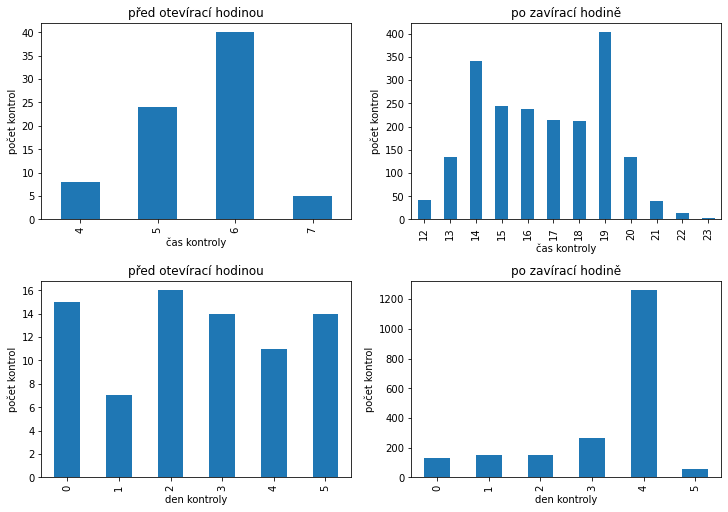

In [23]:
with SupressSettingWithCopyWarning():
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

    do['hour'] = pd.to_datetime(do.DatKont).dt.hour
    df = do[do['diff'] > 100].groupby('hour').DrTP.count()
    df.plot(ax=axes[0, 0],kind='bar',figsize=(10,7))

    po['hour'] = pd.to_datetime(po.DatKont).dt.hour
    df2 = po[po['diff'] > 120].groupby('hour').DrTP.count()
    df2.plot(ax=axes[0, 1], kind='bar',figsize=(10,7))

    axes[0, 0].set_xlabel("čas kontroly")
    axes[0, 0].set_ylabel("počet kontrol")
    axes[0, 0].set_title("před otevírací hodinou")
    axes[0, 1].set_xlabel("čas kontroly")
    axes[0, 1].set_ylabel("počet kontrol")
    axes[0, 1].set_title("po zavírací hodině")

    do['weekday'] = pd.to_datetime(do.DatKont).dt.weekday
    df = do[do['diff'] > 100].groupby('weekday').DrTP.count()
    df.plot(ax=axes[1, 0],kind='bar',figsize=(10,7))

    po['weekday'] = pd.to_datetime(po.DatKont).dt.weekday
    df2 = po[po['diff'] > 120].groupby('weekday').DrTP.count()
    df2.plot(ax=axes[1, 1], kind='bar',figsize=(10,7))

    axes[1, 0].set_xlabel("den kontroly")
    axes[1, 0].set_ylabel("počet kontrol")
    axes[1, 0].set_title("před otevírací hodinou")
    axes[1, 1].set_xlabel("den kontroly")
    axes[1, 1].set_ylabel("počet kontrol")
    axes[1, 1].set_title("po zavírací hodině")

In [182]:
po[po['diff'] > 100].groupby('hour').DrTP.count()

hour
11     21
12     75
13    294
14    366
15    286
16    258
17    375
18    384
19    434
20    139
21     39
22     13
23      4
Name: DrTP, dtype: int64

In [184]:
do[do['diff'] > 100].groupby('hour').DrTP.count()

hour
4     8
5    24
6    40
7     5
Name: DrTP, dtype: int64

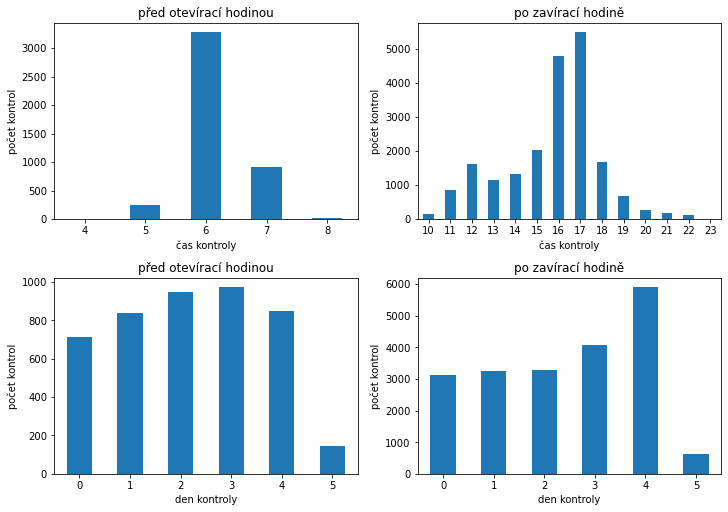

In [30]:
with SupressSettingWithCopyWarning():
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

    do['hour'] = pd.to_datetime(do.DatKont).dt.hour
    df = do.groupby('hour').DrTP.count()
    df.plot(ax=axes[0, 0],kind='bar',figsize=(10,7))

    po['hour'] = pd.to_datetime(po.DatKont).dt.hour
    df2 = po.groupby('hour').DrTP.count()
    df2.plot(ax=axes[0, 1], kind='bar',figsize=(10,7))

    axes[0, 0].set_xlabel("čas kontroly")
    axes[0, 0].set_ylabel("počet kontrol")
    axes[0, 0].set_title("před otevírací hodinou")
    axes[0, 1].set_xlabel("čas kontroly")
    axes[0, 1].set_ylabel("počet kontrol")
    axes[0, 1].set_title("po zavírací hodině")

    do['weekday'] = pd.to_datetime(do.DatKont).dt.weekday
    df = do.groupby('weekday').DrTP.count()
    df.plot(ax=axes[1, 0],kind='bar',figsize=(10,7))

    po['weekday'] = pd.to_datetime(po.DatKont).dt.weekday
    df2 = po.groupby('weekday').DrTP.count()
    df2.plot(ax=axes[1, 1], kind='bar',figsize=(10,7))

    axes[1, 0].set_xlabel("den kontroly")
    axes[1, 0].set_ylabel("počet kontrol")
    axes[1, 0].set_title("před otevírací hodinou")
    axes[1, 1].set_xlabel("den kontroly")
    axes[1, 1].set_ylabel("počet kontrol")
    axes[1, 1].set_title("po zavírací hodině")
    
    for tick in axes[0, 0].get_xticklabels():
        tick.set_rotation(0)
        
    for tick in axes[0, 1].get_xticklabels():
        tick.set_rotation(0)
        
    for tick in axes[1, 0].get_xticklabels():
        tick.set_rotation(0)
    
    for tick in axes[1, 1].get_xticklabels():
        tick.set_rotation(0)
    
    fig.align_labels()

In [ ]:
# stations['Po'] = np.nan
# stations['Ut'] = np.nan
# stations['St'] = np.nan
# stations['Ct'] = np.nan
# stations['Pa'] = np.nan
# stations['So'] = np.nan
# stations['Ne'] = np.nan

# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('Provozní doba','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('Na objednávku','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('Pracovní doba:','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('Po předchozí tel. objednávce','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('Nákladní auta > Dobronická 635\n','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('\r','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('\t','')
# stations['pracovniDoba'] = stations['pracovniDoba'].astype(str).str.replace('\n','')

# for index, row in stations.iterrows():
#     tmp = row['pracovniDoba'].replace(' ', '')
#     if row['pracovniDoba'] == '-':
#             stations.loc[index, 'Po'] = '-'
#             stations.loc[index, 'Ut'] = '-'
#             stations.loc[index, 'St'] = '-'
#             stations.loc[index, 'Ct'] = '-'
#             stations.loc[index, 'Pa'] = '-'
#             stations.loc[index, 'So'] = '-'
#             stations.loc[index, 'Ne'] = '-'
#     if re.match(r'.*Po-Pá:.*', tmp):
#         tmp = tmp[tmp.index('Po-Pá:') + len('Po-Pá:'):]
#         if re.match(r'\d(:|.)\d\d-\d\d(:|.)\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:10]
#             stations.loc[index, 'Ut'] = tmp[:10]
#             stations.loc[index, 'St'] = tmp[:10]
#             stations.loc[index, 'Ct'] = tmp[:10]
#             stations.loc[index, 'Pa'] = tmp[:10]
            
#             if re.match(r'.*So:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:10]
            
#             if re.match(r'.*Ne:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:10]
                
#         if re.match(r'\d-\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:4]
#             stations.loc[index, 'Ut'] = tmp[:4]
#             stations.loc[index, 'St'] = tmp[:4]
#             stations.loc[index, 'Ct'] = tmp[:4]
#             stations.loc[index, 'Pa'] = tmp[:4]
            
#             if re.match(r'.*So:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:4]
                
#             if re.match(r'.*Ne:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:4]
                
#     tmp = row['pracovniDoba'].replace(' ', '')      
#     if re.match(r'.*Po-Čt:.*', tmp):
#         tmp = tmp[tmp.index('Po-Čt:') + len('Po-Čt:'):]
#         if re.match(r'\d(:|.)\d\d-\d\d(:|.)\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:10]
#             stations.loc[index, 'Ut'] = tmp[:10]
#             stations.loc[index, 'St'] = tmp[:10]
#             stations.loc[index, 'Ct'] = tmp[:10]
            
#             if re.match(r'.*Pá:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:10]
            
#             if re.match(r'.*So:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:10]
                
#             if re.match(r'.*Ne:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:10]
            
#         if re.match(r'\d-\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:4]
#             stations.loc[index, 'Ut'] = tmp[:4]
#             stations.loc[index, 'St'] = tmp[:4]
#             stations.loc[index, 'Ct'] = tmp[:4]
            
#             if re.match(r'.*Pá:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:4]
            
#             if re.match(r'.*So:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:4]
                
#             if re.match(r'.*Ne:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:4]
                
#     tmp = row['pracovniDoba'].replace(' ', '')               
#     if re.match(r'.*Po,St:.*', tmp):
#         tmp = tmp[tmp.index('Po,St:') + len('Po,St:'):]
#         if re.match(r'\d(:|.)\d\d-\d\d(:|.)\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:10]
#             stations.loc[index, 'St'] = tmp[:10]
            
#             if re.match(r'.*Pá:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:10]
            
#             if re.match(r'.*So:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:10]
                
#             if re.match(r'.*Ne:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:10]
            
#         if re.match(r'\d-\d\d.*', tmp):
#             stations.loc[index, 'Po'] = tmp[:4]
#             stations.loc[index, 'St'] = tmp[:4]
            
#             if re.match(r'.*Pá:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:4]
            
#             if re.match(r'.*So:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:4]
                
#             if re.match(r'.*Ne:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:4]
                
#     tmp = row['pracovniDoba'].replace(' ', '')                
#     if re.match(r'.*Út,Čt:.*', tmp):
#         tmp = tmp[tmp.index('Út,Čt:') + len('Út,Čt:'):]
#         if re.match(r'\d(:|.)\d\d-\d\d(:|.)\d\d.*', tmp):
#             stations.loc[index, 'Ut'] = tmp[:10]
#             stations.loc[index, 'Ct'] = tmp[:10]
            
#             if re.match(r'.*Pá:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:10]
            
#             if re.match(r'.*So:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:10]
                
#             if re.match(r'.*Ne:.*', tmp[10:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:10]
            
#         if re.match(r'\d-\d\d.*', tmp):
#             stations.loc[index, 'Ut'] = tmp[:4]
#             stations.loc[index, 'Ct'] = tmp[:4]
            
#             if re.match(r'.*Pá:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#                 stations.loc[index, 'Pa'] = tmp[:4]
            
#             if re.match(r'.*So:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('So:') + len('So:'):]
#                 stations.loc[index, 'So'] = tmp[:4]
                
#             if re.match(r'.*Ne:.*', tmp[4:]):
#                 tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#                 stations.loc[index, 'Ne'] = tmp[:4]
                
#     tmp = row['pracovniDoba'].replace(' ', '')                
#     if re.match(r'\d(:|.)\d\d-\d\d(:|.)\d\d.*', tmp):
#         if re.match(r'.*Po:.*', tmp[10:]):
#             tmp = tmp[tmp.index('Po:') + len('Po:'):]
#             stations.loc[index, 'Po'] = tmp[:10]

#         if re.match(r'.*Út:.*', tmp[10:]):
#             tmp = tmp[tmp.index('Út:') + len('Út:'):]
#             stations.loc[index, 'Út'] = tmp[:10]
            
#         if re.match(r'.*St:.*', tmp[10:]):
#             tmp = tmp[tmp.index('St:') + len('St:'):]
#             stations.loc[index, 'St'] = tmp[:10]
        
#         if re.match(r'.*Čt:.*', tmp[10:]):
#             tmp = tmp[tmp.index('Čt:') + len('Čt:'):]
#             stations.loc[index, 'Čt'] = tmp[:10]
            
#         if re.match(r'.*Pá:.*', tmp[10:]):
#             tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#             stations.loc[index, 'Pa'] = tmp[:10]

#         if re.match(r'.*So:.*', tmp[10:]):
#             tmp = tmp[tmp.index('So:') + len('So:'):]
#             stations.loc[index, 'So'] = tmp[:10]

#         if re.match(r'.*Ne:.*', tmp[10:]):
#             tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#             stations.loc[index, 'Ne'] = tmp[:10]
            
#     tmp = row['pracovniDoba'].replace(' ', '')
#     if re.match(r'\d-\d\d.*', tmp):
#         if re.match(r'.*Po:.*', tmp[4:]):
#             tmp = tmp[tmp.index('Po:') + len('Po:'):]
#             stations.loc[index, 'Po'] = tmp[:4]

#         if re.match(r'.*Út:.*', tmp[4:]):
#             tmp = tmp[tmp.index('Út:') + len('Út:'):]
#             stations.loc[index, 'Ut'] = tmp[:4]
            
#         if re.match(r'.*St:.*', tmp[4:]):
#             tmp = tmp[tmp.index('St:') + len('St:'):]
#             stations.loc[index, 'St'] = tmp[:4]
        
#         if re.match(r'.*Čt:.*', tmp[4:]):
#             tmp = tmp[tmp.index('Čt:') + len('Čt:'):]
#             stations.loc[index, 'Ct'] = tmp[:4]
#         if re.match(r'.*Pá:.*', tmp[4:]):
#             tmp = tmp[tmp.index('Pá:') + len('Pá:'):]
#             stations.loc[index, 'Pa'] = tmp[:4]

#         if re.match(r'.*So:.*', tmp[4:]):
#             tmp = tmp[tmp.index('So:') + len('So:'):]
#             stations.loc[index, 'So'] = tmp[:4]

#         if re.match(r'.*Ne:.*', tmp[4:]):
#             tmp = tmp[tmp.index('Ne:') + len('Ne:'):]
#             stations.loc[index, 'Ne'] = tmp[:4]
            

# stations['Po'] = stations['Po'].astype(str).str.replace(':00','')
# stations['Ut'] = stations['Ut'].astype(str).str.replace(':00','')
# stations['St'] = stations['St'].astype(str).str.replace(':00','')
# stations['Ct'] = stations['Ct'].astype(str).str.replace(':00','')
# stations['Pa'] = stations['Pa'].astype(str).str.replace(':00','')
# stations['So'] = stations['So'].astype(str).str.replace(':00','')
# stations['Ne'] = stations['Ne'].astype(str).str.replace(':00','')